In [1]:
import torch
import CocoFolder
import Mytransforms
import numpy as np
import cv2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dir = ['/home/hypan/data/coco/filelist/train2017.txt', '/home/hypan/data/coco/masklist/train2017.txt', '/home/hypan/data/coco/json/train2017.json']

loader = torch.utils.data.DataLoader(
    CocoFolder.CocoFolder(dir, 8,
                Mytransforms.Compose([Mytransforms.RandomResized(),
                Mytransforms.RandomRotate(40),
                Mytransforms.RandomCrop(368),
                Mytransforms.RandomHorizontalFlip(),
            ])),
    batch_size=4, shuffle=False,
    num_workers=1, pin_memory=True)

In [3]:
for i, (input, heatmap, vecmap, mask) in enumerate(loader):
    imgs = input.numpy()
    heats = heatmap.numpy()
    vectors = vecmap.numpy()
    masks = mask.numpy()
    break

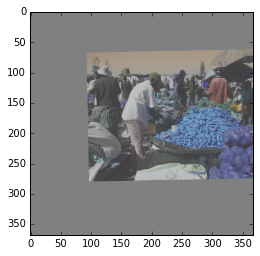

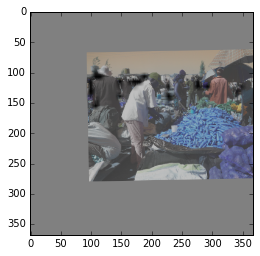

1


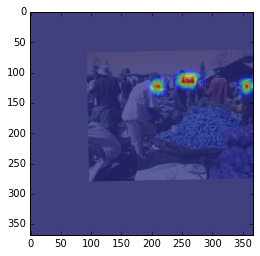

2


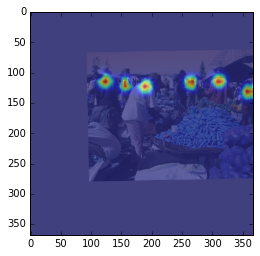

3


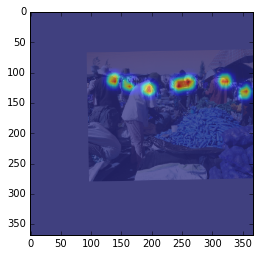

4


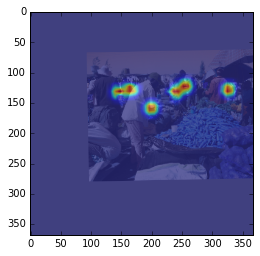

5


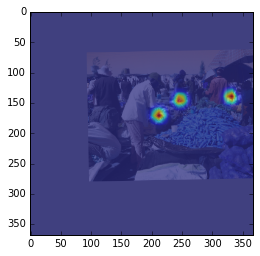

6


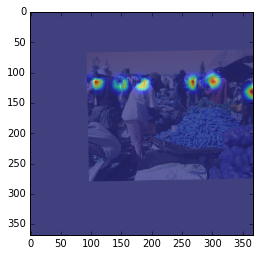

7


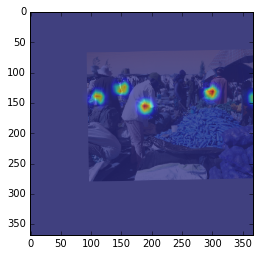

8


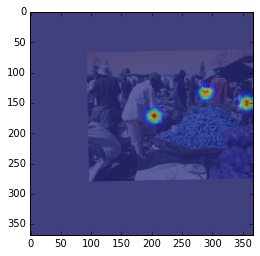

9


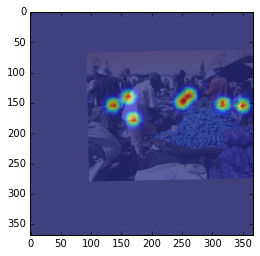

10


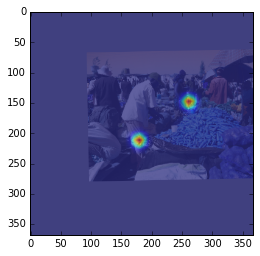

11


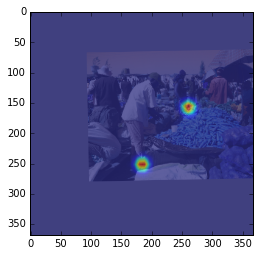

12


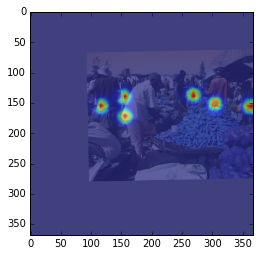

13


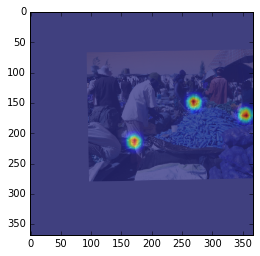

14


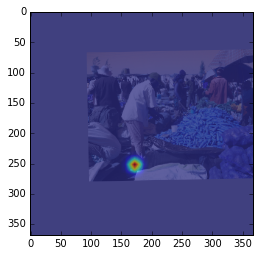

15


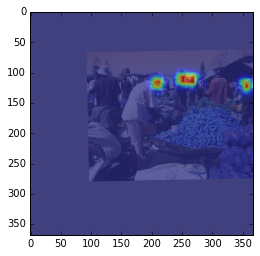

16


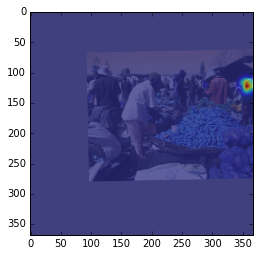

17


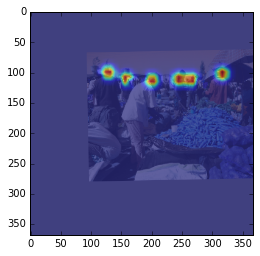

18


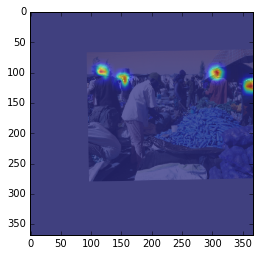

0


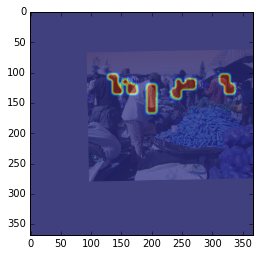

2


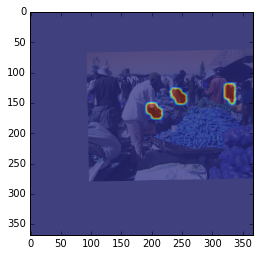

4


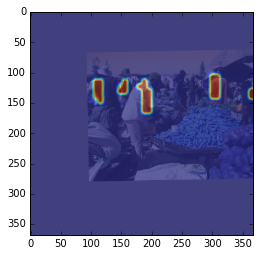

6


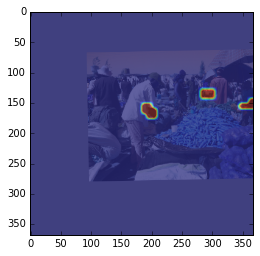

8


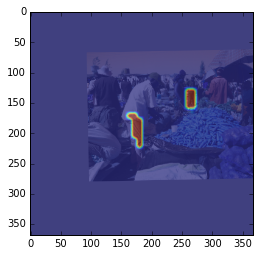

10


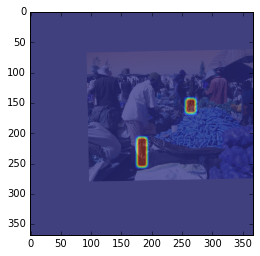

12


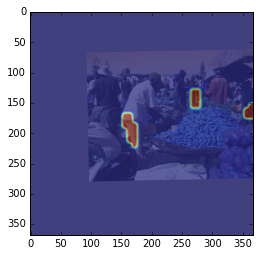

14


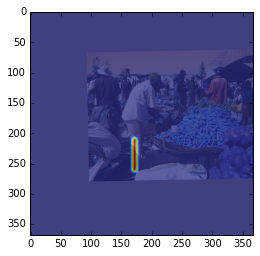

16


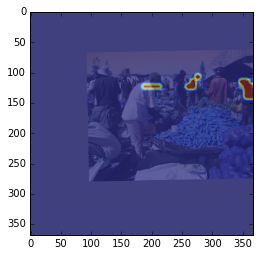

18


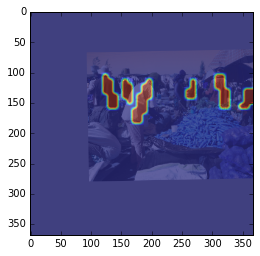

20


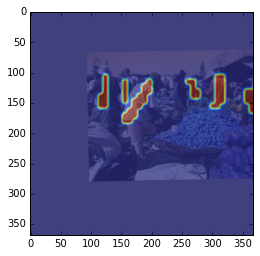

22


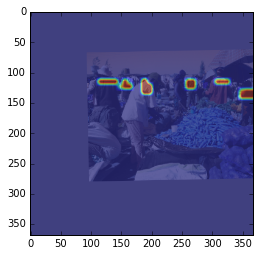

24


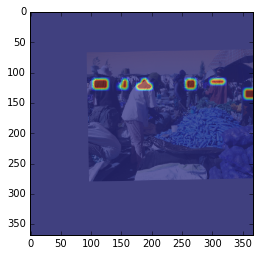

26


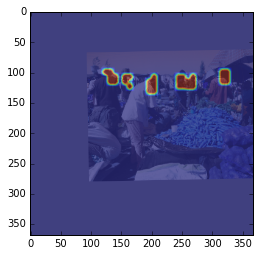

28


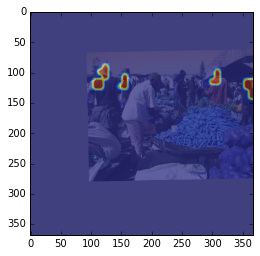

30


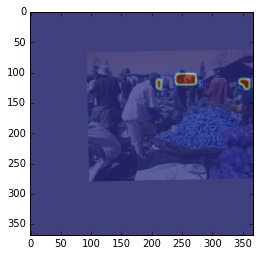

32


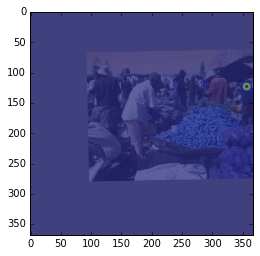

34


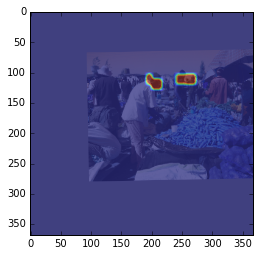

36


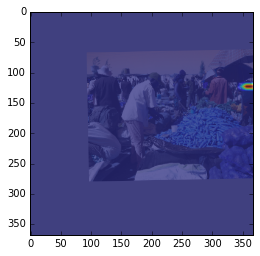

done!


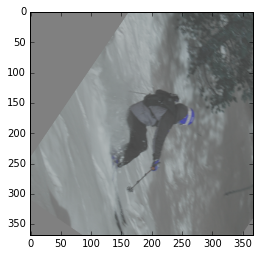

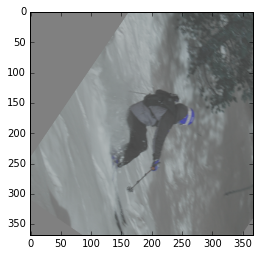

1


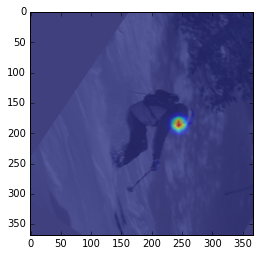

2


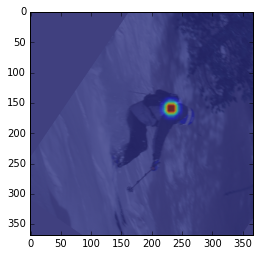

3


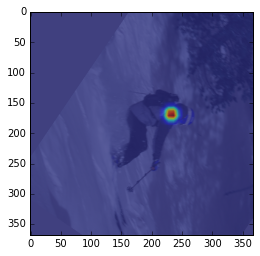

4


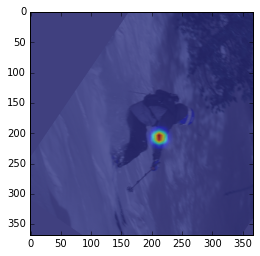

5


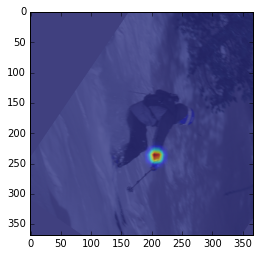

6


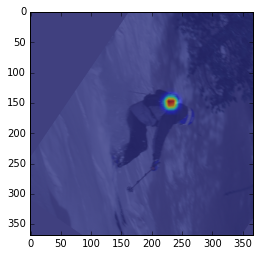

7


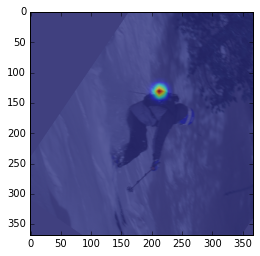

8


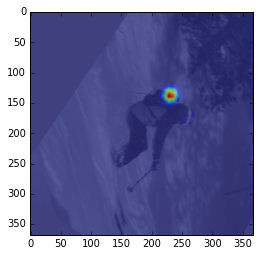

9


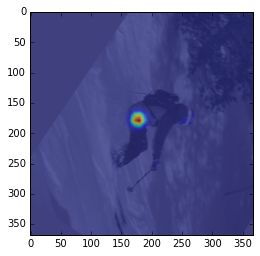

10


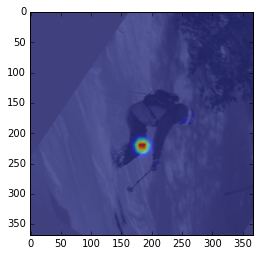

11


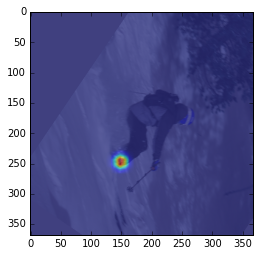

12


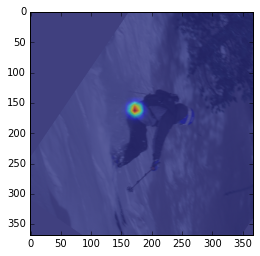

13


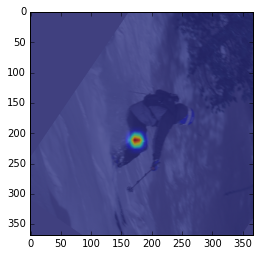

14


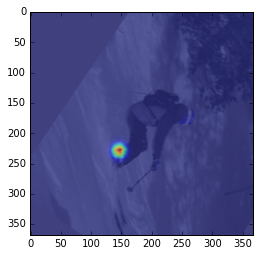

15


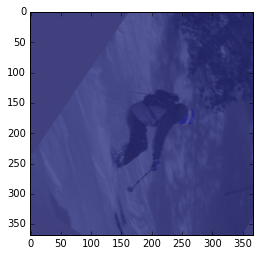

16


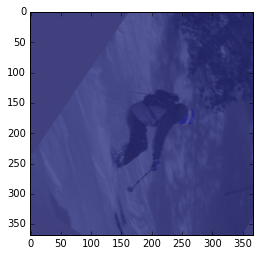

17


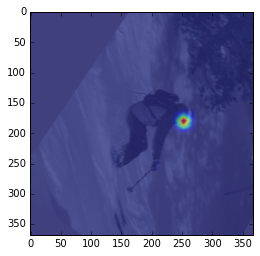

18


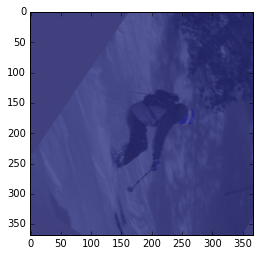

0


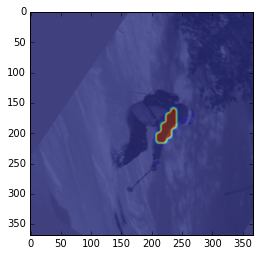

2


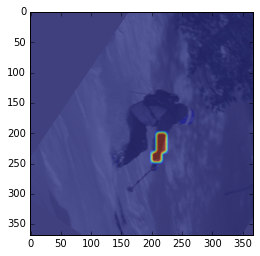

4


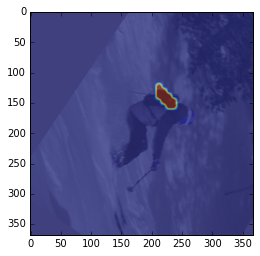

6


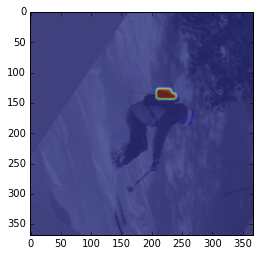

8


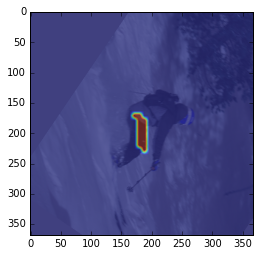

10


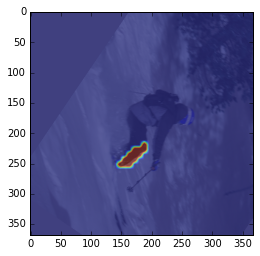

12


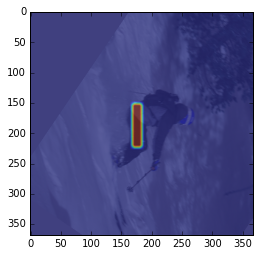

14


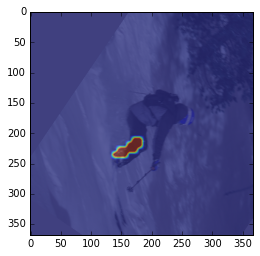

16


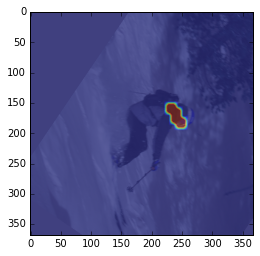

18


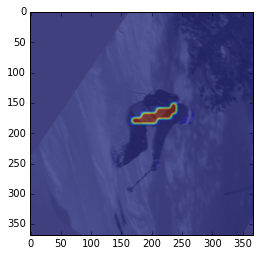

20


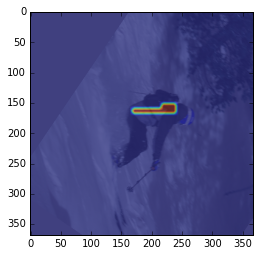

22


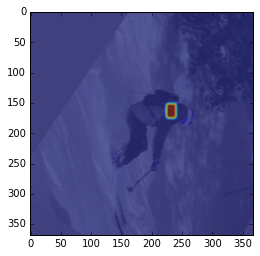

24


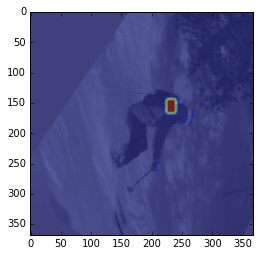

26


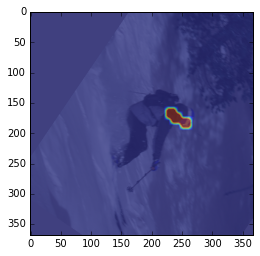

28


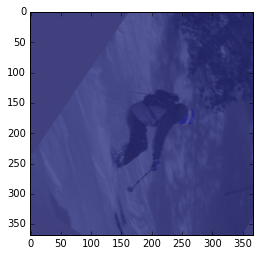

30


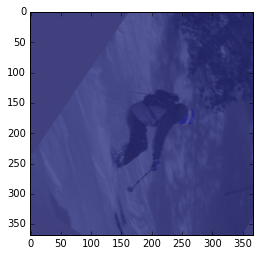

32


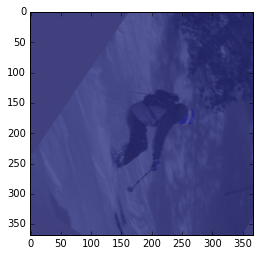

34


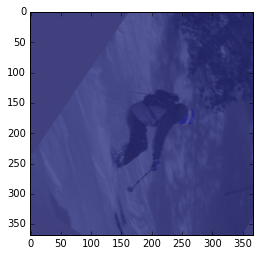

36


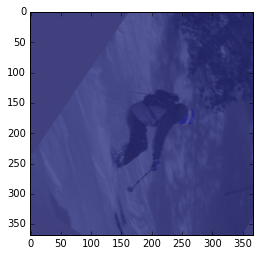

done!


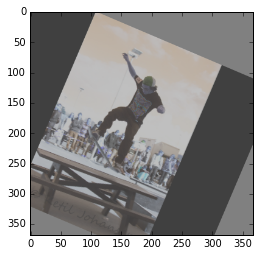

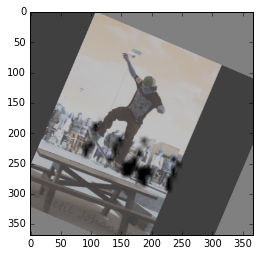

1


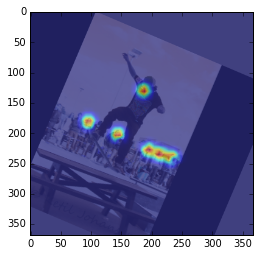

2


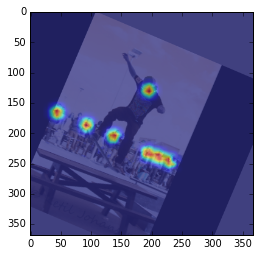

3


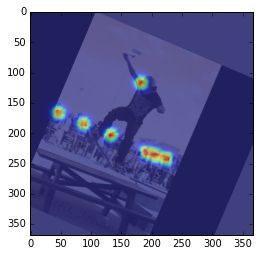

4


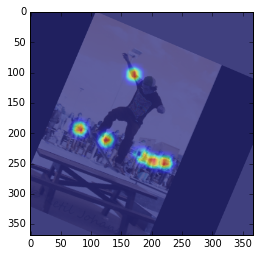

5


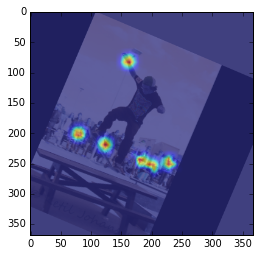

6


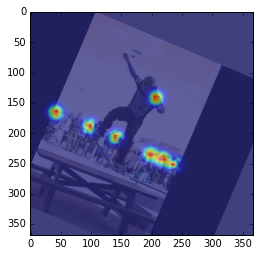

7


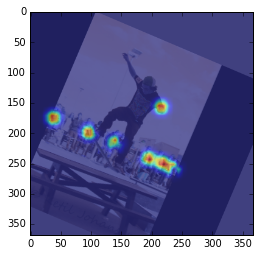

8


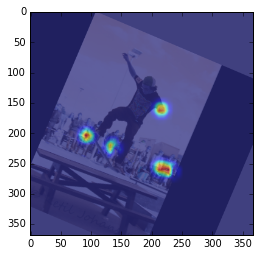

9


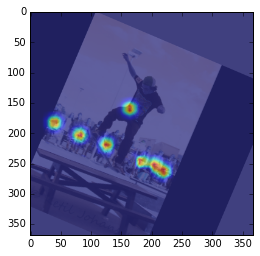

10


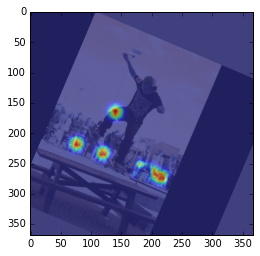

11


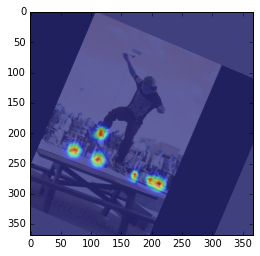

12


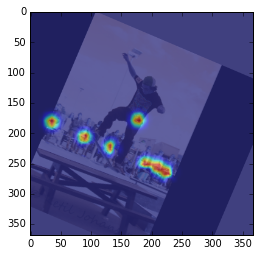

13


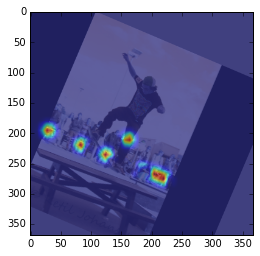

14


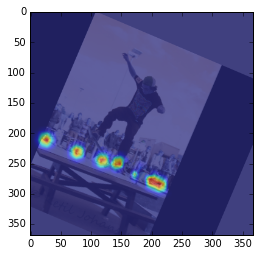

15


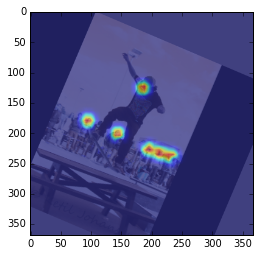

16


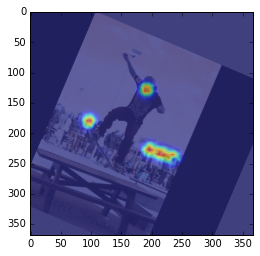

17


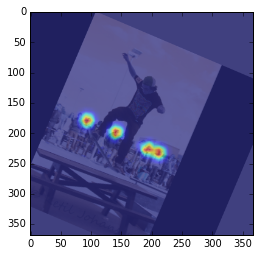

18


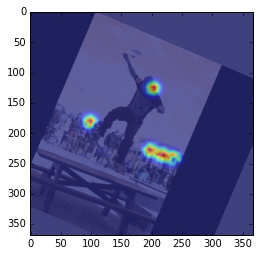

0


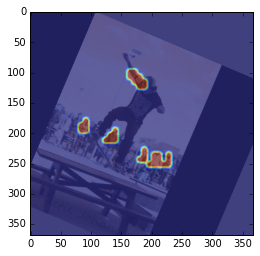

2


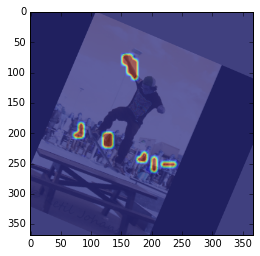

4


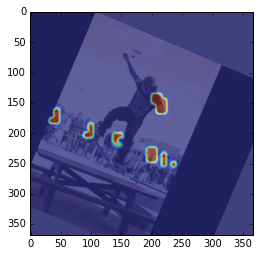

6


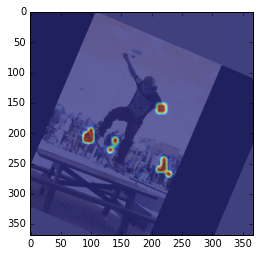

8


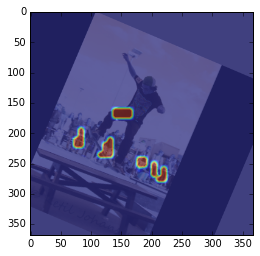

10


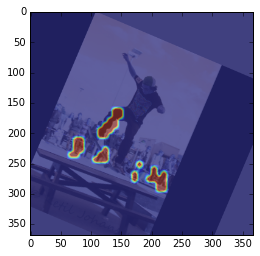

12


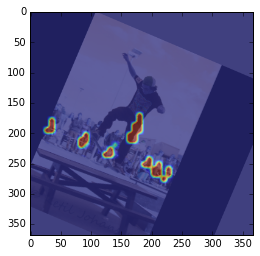

14


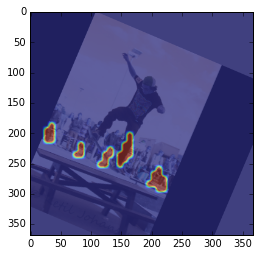

16


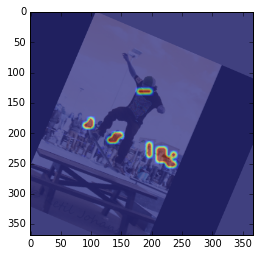

18


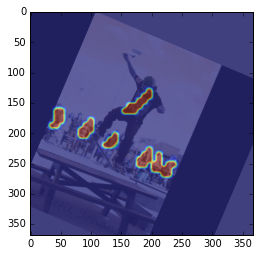

20


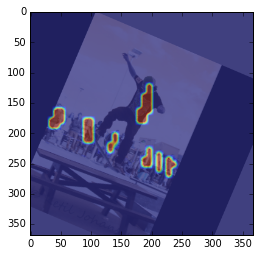

22


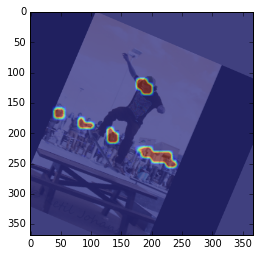

24


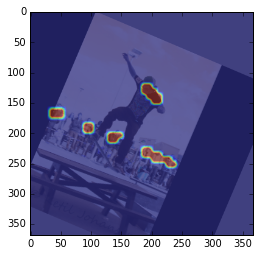

26


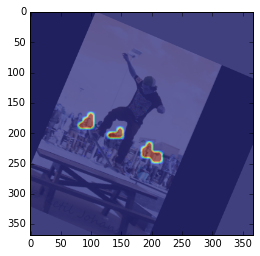

28


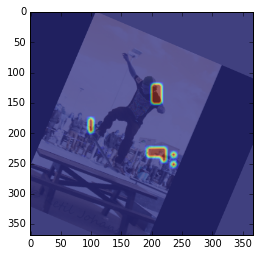

30


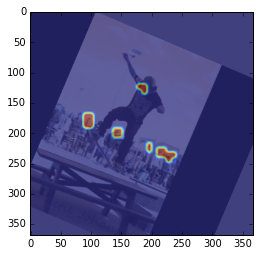

32


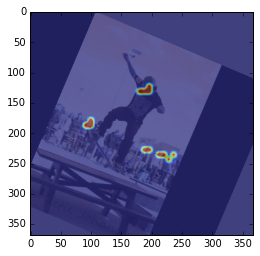

34


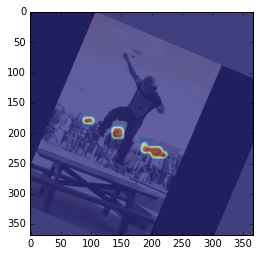

36


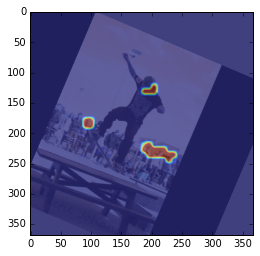

done!


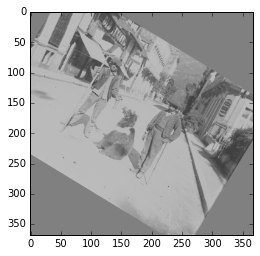

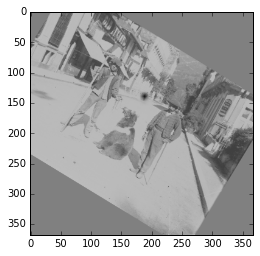

1


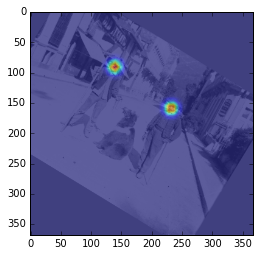

2


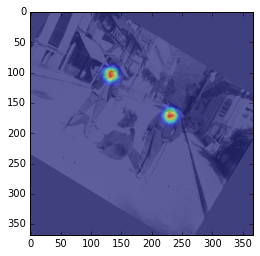

3


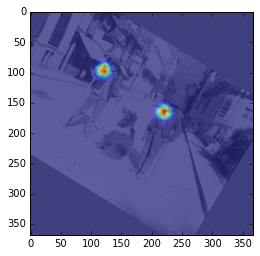

4


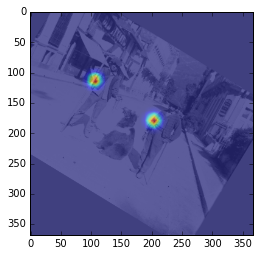

5


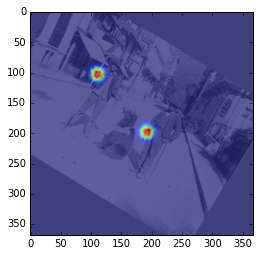

6


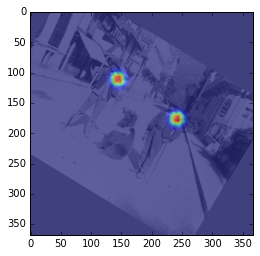

7


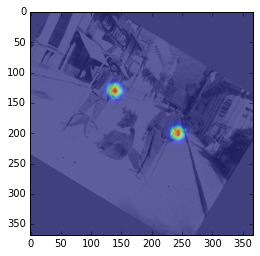

8


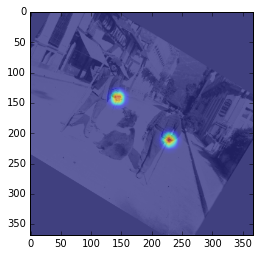

9


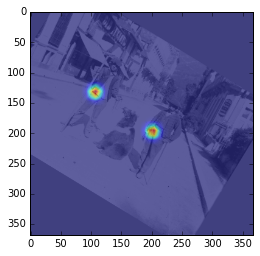

10


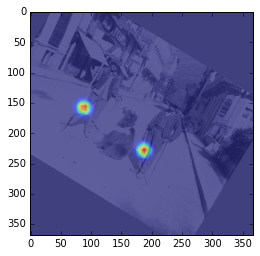

11


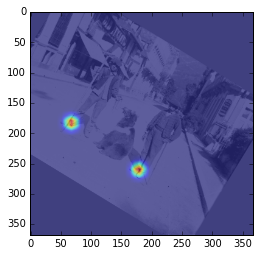

12


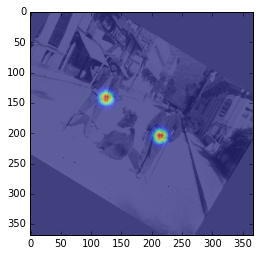

13


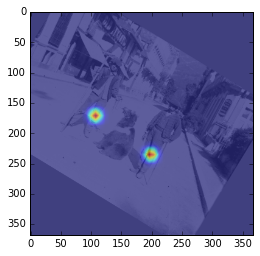

14


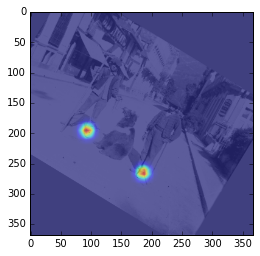

15


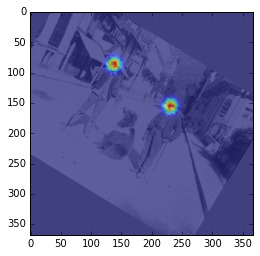

16


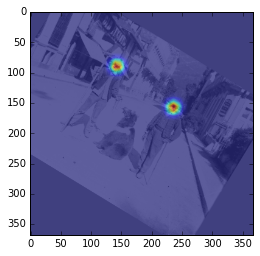

17


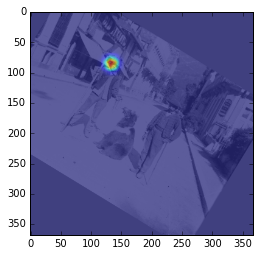

18


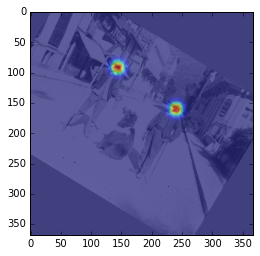

0


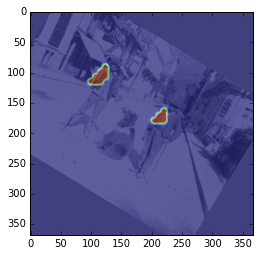

2


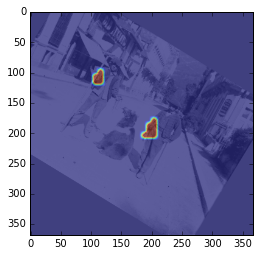

4


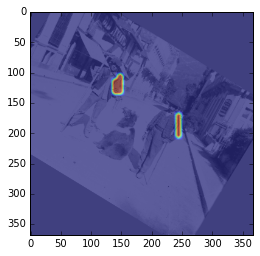

6


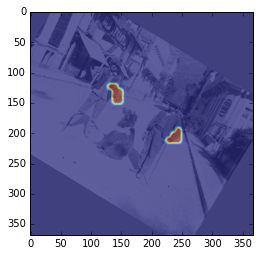

8


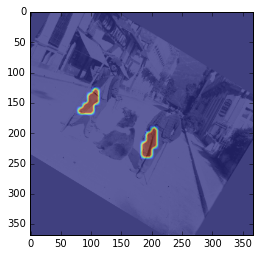

10


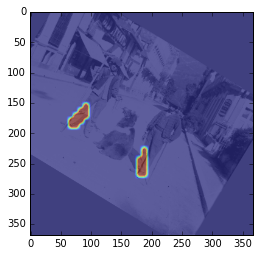

12


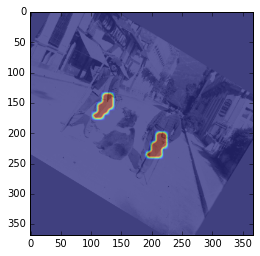

14


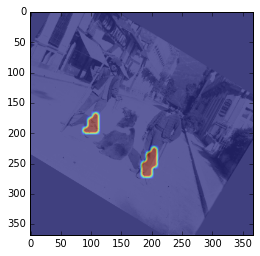

16


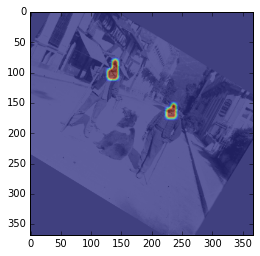

18


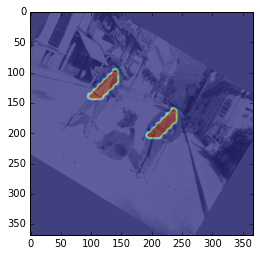

20


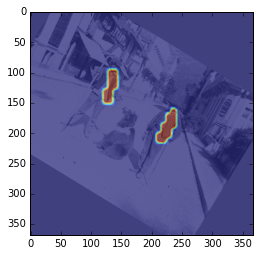

22


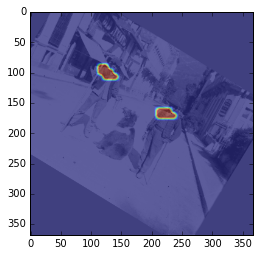

24


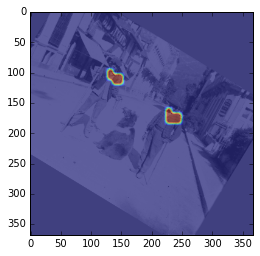

26


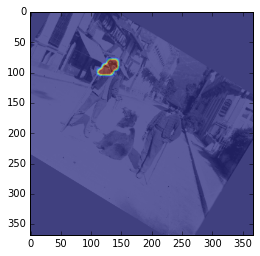

28


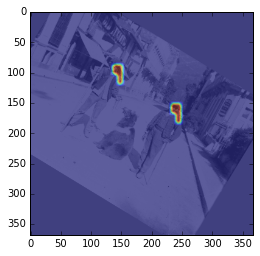

30


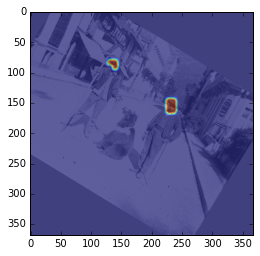

32


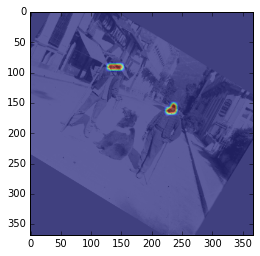

34


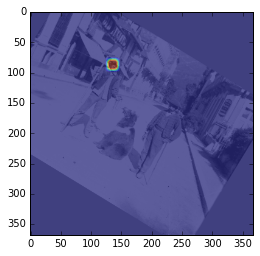

36


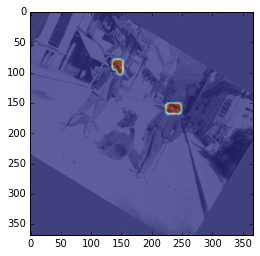

done!


In [4]:
for i in range(4):
    img = imgs[i,:,:,:]
    img = img.transpose(1, 2, 0)
    img *= 128
    img += 128
    img /= 255
    plt.imshow(img)
    plt.show()
    plt.close()
    
    mask = masks[i,:,:,:]
    mask = mask.transpose(1,2,0)
    mask = cv2.resize(mask, (368, 368))
    mask = mask.reshape((368, 368, 1))
    new_img = img * mask
    plt.imshow(new_img)
    plt.show()
    plt.close()
    
    heatmaps = heats[i,:,:,:]
    heatmaps = heatmaps.transpose(1, 2, 0)
    heatmaps = cv2.resize(heatmaps, (368, 368))
    for j in range(1, 19):
        heatmap = heatmaps[:,:,j]
        heatmap = heatmap.reshape((368,368,1))
        heatmap *= 255
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        # heatmap = heatmap.reshape((368,368,1))
        heatmap /= 255
        # result = heatmap * 0.4 + img * 0.5
        print j
        plt.imshow(img)
        plt.imshow(heatmap, alpha=0.5)
        plt.show()
        plt.close()
        
    vecs = vectors[i,:,:,:]
    vecs = vecs.transpose(1, 2, 0)
    vecs = cv2.resize(vecs, (368, 368))
    for j in range(0, 38, 2):
        vec = np.abs(vecs[:,:,j])
        vec += np.abs(vecs[:,:,j + 1])
        vec[vec > 1] = 1
        vec = vec.reshape((368,368,1))
        # vec[vec > 0] = 1
        vec *= 255
        vec = cv2.applyColorMap(vec, cv2.COLORMAP_JET)
        vec = vec.reshape((368,368))
        vec /= 255
        print j
        plt.imshow(img)
        # result = vec * 0.4 + img * 0.5
        plt.imshow(vec,alpha=0.5)
        plt.show()
        plt.close()
    print 'done!'
    